In [1]:
pip install worldcloud

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement worldcloud (from versions: none)
ERROR: No matching distribution found for worldcloud


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import HTML, display
import seaborn as sns; sns.set()
from wordcloud import WordCloud

## Get the Data

In [3]:
df=pd.read_csv('listings.csv')
df.head()

C:\Users\Aishat\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,21,3,2022-08-10,0.03,1,267,1,NaN
1,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.73,1,0,0,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,322,0,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,559,2022-11-20,3.38,1,79,50,NaN
4,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,175,30,49,2022-06-21,0.31,3,365,1,NaN


## Understanding the dataset

In [4]:
df.shape

(41533, 18)

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41533 entries, 0 to 41532
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              41533 non-null  int64  
 1   name                            41520 non-null  object 
 2   host_id                         41533 non-null  int64  
 3   host_name                       41528 non-null  object 
 4   neighbourhood_group             41533 non-null  object 
 5   neighbourhood                   41533 non-null  object 
 6   latitude                        41533 non-null  float64
 7   longitude                       41533 non-null  float64
 8   room_type                       41533 non-null  object 
 9   price                           41533 non-null  int64  
 10  minimum_nights                  41533 non-null  int64  
 11  number_of_reviews               41533 non-null  int64  
 12  last_review                     

In [6]:
df.isnull().sum()

id                                    0
name                                 13
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        9393
reviews_per_month                  9393
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           41532
dtype: int64

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,4.153300e+04,4.153300e+04,41533.000000,41533.000000,41533.000000,41533.000000,41533.000000,32140.000000,41533.000000,41533.000000,41533.000000
mean,1.728318e+17,1.400636e+08,40.728292,-73.944526,221.978282,18.592204,26.204994,1.279287,20.626803,143.287771,7.983700
std,2.974371e+17,1.526932e+08,0.057145,0.055965,919.502236,30.699921,56.178847,1.935098,68.874393,144.279510,18.563894
min,2.595000e+03,2.438000e+03,40.500314,-74.249840,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.835861e+07,1.491162e+07,40.687750,-73.982410,80.000000,2.000000,1.000000,0.140000,1.000000,0.000000,0.000000
50%,4.117861e+07,6.561181e+07,40.723830,-73.953156,131.000000,10.000000,5.000000,0.580000,1.000000,87.000000,1.000000
75%,5.477978e+17,2.418897e+08,40.762200,-73.924990,220.000000,30.000000,25.000000,1.880000,4.000000,312.000000,8.000000
max,7.741268e+17,4.899967e+08,40.911380,-73.710870,98159.000000,1250.000000,1666.000000,102.980000,487.000000,365.000000,992.000000


In [8]:
print("Neighbourhood Groups:", df['neighbourhood_group'].unique().tolist())
print("Room Types:", df['room_type'].unique().tolist())

Neighbourhood Groups: ['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island']
Room Types: ['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']


In [9]:
print(df['price'].describe(percentiles=[.25, .50, .75, .95]))

count    41533.000000
mean       221.978282
std        919.502236
min          0.000000
25%         80.000000
50%        131.000000
75%        220.000000
95%        581.000000
max      98159.000000
Name: price, dtype: float64


## Data Exploration

In [10]:
# we noted that the room_type is only of 3 particular types.
df['room_type'].value_counts()

Entire home/apt    23526
Private room       17287
Shared room          532
Hotel room           188
Name: room_type, dtype: int64

<AxesSubplot:ylabel='room_type'>

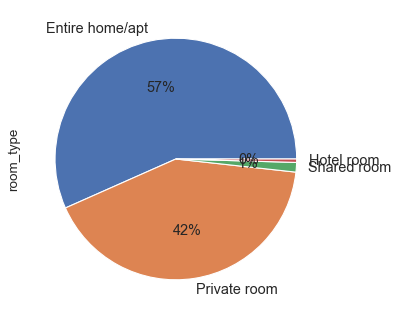

In [11]:
fig = plt.figure(figsize=(5,5), dpi=80)
df['room_type'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

In [12]:
# There are 5 particular neighbourhood_group, which means 5 unique locations.
df['neighbourhood_group'].value_counts()

Manhattan        17334
Brooklyn         15688
Queens            6519
Bronx             1587
Staten Island      405
Name: neighbourhood_group, dtype: int64

In [13]:
df['neighbourhood'].value_counts().iloc[:5]

Bedford-Stuyvesant    2936
Williamsburg          2570
Harlem                1949
Midtown               1918
Bushwick              1752
Name: neighbourhood, dtype: int64

C:\Users\Aishat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Neighbourhood Distribution')

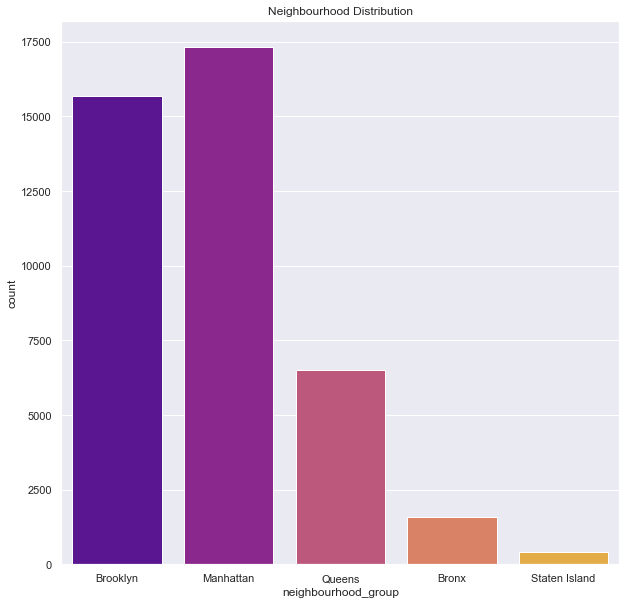

In [14]:
sns.countplot(df['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Distribution')

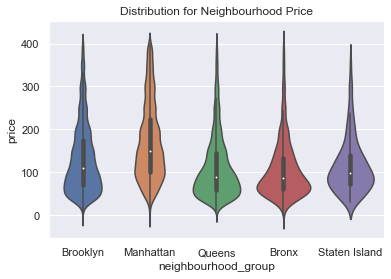

In [15]:
price_df=df[df.price < 400]
viz_2=sns.violinplot(data=price_df, x='neighbourhood_group', y='price')
viz_2.set_title('Distribution for Neighbourhood Price')
plt.show()

C:\Users\Aishat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


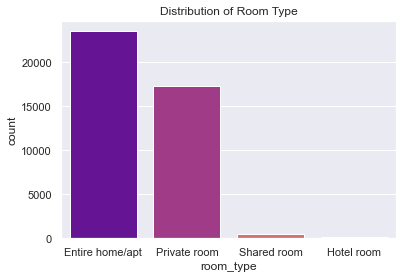

In [16]:
ax = sns.countplot('room_type',data=df,order=df['room_type'].value_counts().index, palette="plasma")
ax.set_title('Distribution of Room Type')
plt.show()

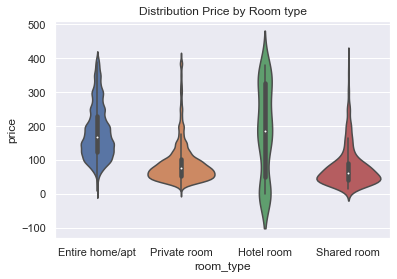

In [17]:
viz_2=sns.violinplot(data=price_df, x='room_type', y='price')
viz_2.set_title('Distribution Price by Room type')
plt.show()

C:\Users\Aishat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


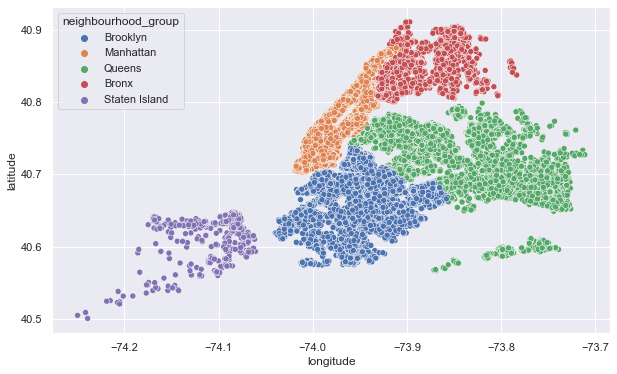

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

C:\Users\Aishat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


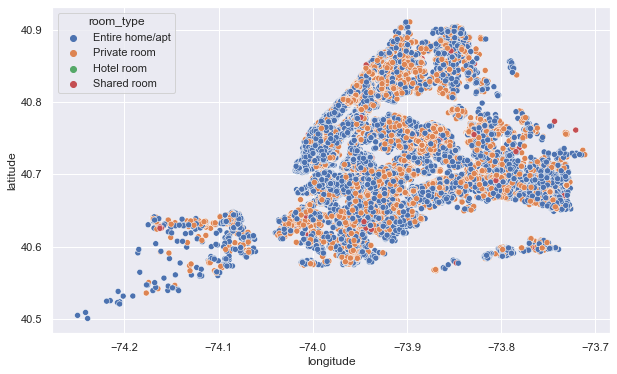

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.room_type)
plt.ioff()

## Variable Correlations

In [20]:
df.corr().style.background_gradient(cmap='coolwarm')
# plt.show()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,1.000000,0.367908,0.004049,0.085652,0.052341,-0.142932,-0.211324,0.271497,0.076095,0.323423,-0.069172
host_id,0.367908,1.000000,0.023445,0.156052,0.037734,-0.156608,-0.090091,0.282474,-0.022939,0.272950,0.126035
latitude,0.004049,0.023445,1.000000,0.046945,0.011415,0.031233,-0.041686,-0.041575,0.039864,-0.016416,-0.042152
longitude,0.085652,0.156052,0.046945,1.000000,-0.064395,-0.088284,0.046290,0.113733,-0.081632,0.127564,0.072326
price,0.052341,0.037734,0.011415,-0.064395,1.000000,-0.028814,-0.014933,0.007564,0.019750,0.037110,-0.007198
minimum_nights,-0.142932,-0.156608,0.031233,-0.088284,-0.028814,1.000000,-0.135415,-0.242837,0.136722,-0.093994,-0.206901
number_of_reviews,-0.211324,-0.090091,-0.041686,0.046290,-0.014933,-0.135415,1.000000,0.532937,-0.100448,0.082328,0.653603
reviews_per_month,0.271497,0.282474,-0.041575,0.113733,0.007564,-0.242837,0.532937,1.000000,-0.038993,0.238683,0.829774
calculated_host_listings_count,0.076095,-0.022939,0.039864,-0.081632,0.019750,0.136722,-0.100448,-0.038993,1.000000,0.152328,-0.069624
availability_365,0.323423,0.272950,-0.016416,0.127564,0.037110,-0.093994,0.082328,0.238683,0.152328,1.000000,0.157874


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

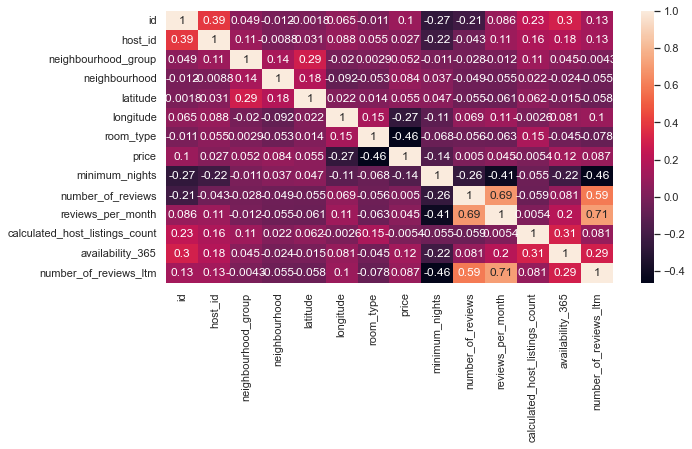

In [44]:
corr = df.corr(method='kendall')
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True)
df.columns

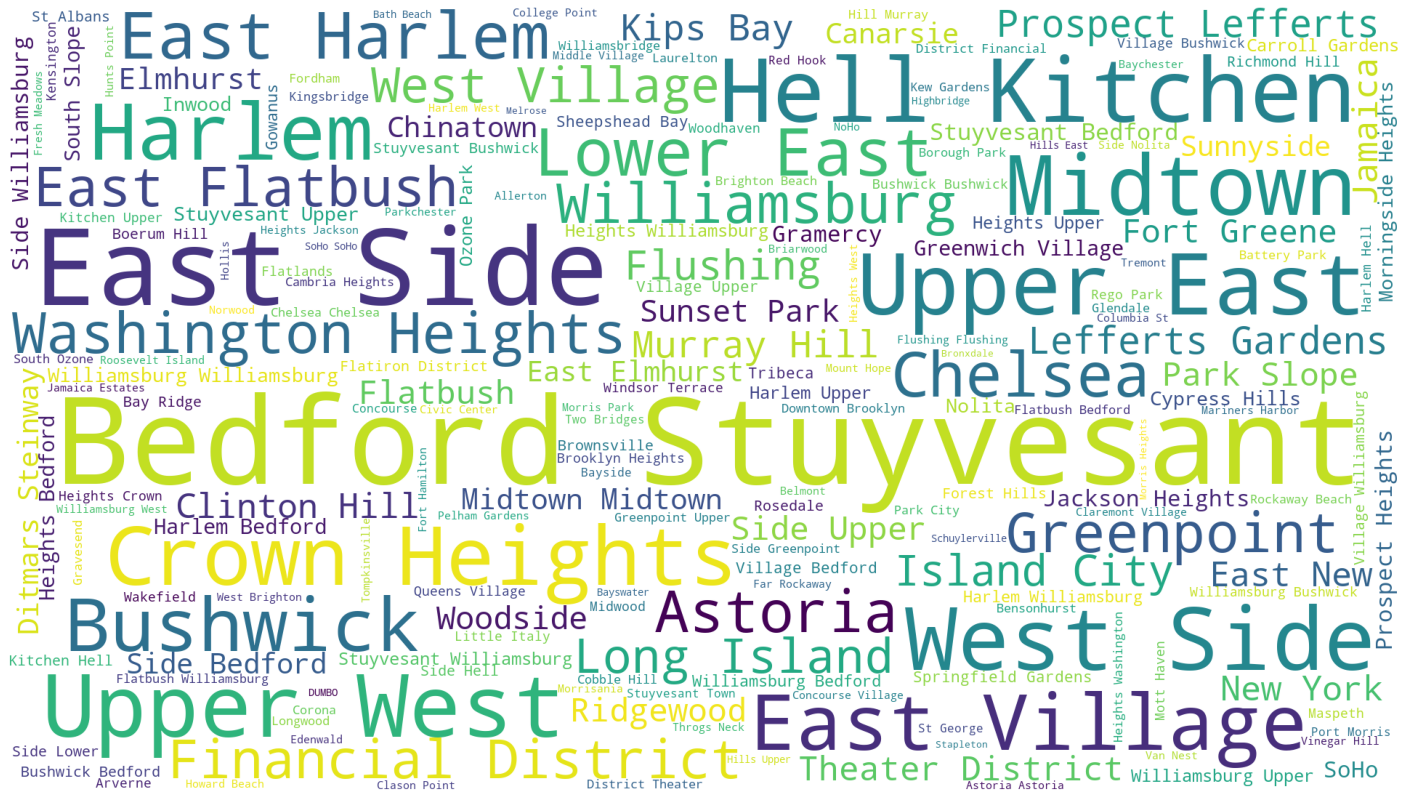

In [22]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

In [23]:
df.price.describe()

count    41533.000000
mean       221.978282
std        919.502236
min          0.000000
25%         80.000000
50%        131.000000
75%        220.000000
max      98159.000000
Name: price, dtype: float64

In [24]:
df['minimum_nights'].value_counts()

30     17625
1       7202
2       5329
3       3780
5       1492
       ...  
153        1
999        1
53         1
19         1
88         1
Name: minimum_nights, Length: 126, dtype: int64

<AxesSubplot:xlabel='room_type', ylabel='count'>

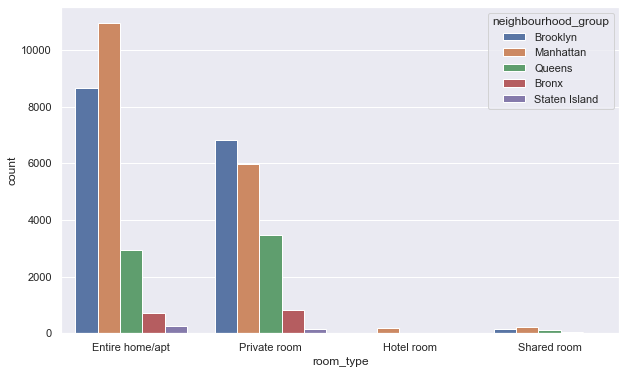

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'room_type', hue = 'neighbourhood_group')

In [26]:
df['neighbourhood'].value_counts().iloc[:10]

Bedford-Stuyvesant    2936
Williamsburg          2570
Harlem                1949
Midtown               1918
Bushwick              1752
Hell's Kitchen        1533
Upper West Side       1514
Upper East Side       1428
Crown Heights         1299
East Village          1171
Name: neighbourhood, dtype: int64

<AxesSubplot:>

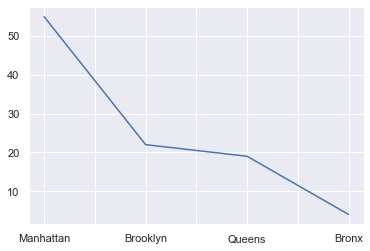

In [27]:
# Rooms with top 100 minimum_nights  by neighbourhood
dfr=df.sort_values(by=['minimum_nights'],ascending=False).head(100)
dfr['neighbourhood_group'].value_counts().plot()

## Preparing the Data

In [28]:
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor


In [29]:
df['reviews_per_month']=df['reviews_per_month'].replace(np.nan, 0)

In [30]:
'''Encode labels with value between 0 and n_classes-1.'''
le = preprocessing.LabelEncoder() # Fit label encoder
le.fit(df['neighbourhood_group'])
df['neighbourhood_group']=le.transform(df['neighbourhood_group']) # Transform labels to normalized encoding.

In [31]:
le = preprocessing.LabelEncoder()
le.fit(df['neighbourhood'])
df['neighbourhood']=le.transform(df['neighbourhood'])

In [32]:
le = preprocessing.LabelEncoder()
le.fit(df['room_type'])
df['room_type']=le.transform(df['room_type'])

In [33]:
df.sort_values(by='price',ascending=True,inplace=True)

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
22006,43247386,6 Columbus Central Park Hotel,335072254,Six Columbus Central Park Hotel,2,97,40.767560,-73.983120,1,0,1,20,2022-08-29,1.09,1,0,8,NaN
21148,42065543,Broadway Plaza Hotel,307634016,Broadway Plaza,2,130,40.744440,-73.989200,1,0,1,329,2022-11-04,12.90,1,0,56,NaN
21167,42065563,Opera House Hotel,309772430,Opera House Hotel,0,137,40.815130,-73.916020,1,0,30,0,NaN,0.00,1,0,0,NaN
21010,41740615,The James New York - NoMad,268417148,The James NoMad,2,130,40.744590,-73.985740,1,0,1,48,2022-10-10,1.27,1,0,12,NaN
24785,48417136,HGU New York,390810530,Marcos,2,130,40.746836,-73.982699,1,0,1,53,2022-09-19,2.76,1,0,40,NaN


## Training the Linear Regression Model

In [34]:
lm = LinearRegression()

X = df[['neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lm.fit(X_train,y_train)

LinearRegression()

In [35]:
'''Get Predictions & Print Metrics'''
predicts = lm.predict(X_test)

print("""
        Mean Absolute Error: {}
        Root Mean Squared Error: {}
        R2 Score: {}
     """.format(
        mean_absolute_error(y_test,predicts),
        np.sqrt(metrics.mean_squared_error(y_test, predicts)),
        r2_score(y_test,predicts),
        ))


        Mean Absolute Error: 155.2150720887138
        Root Mean Squared Error: 824.0292262366524
        R2 Score: 0.015463947121196364
     


C:\Users\Aishat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


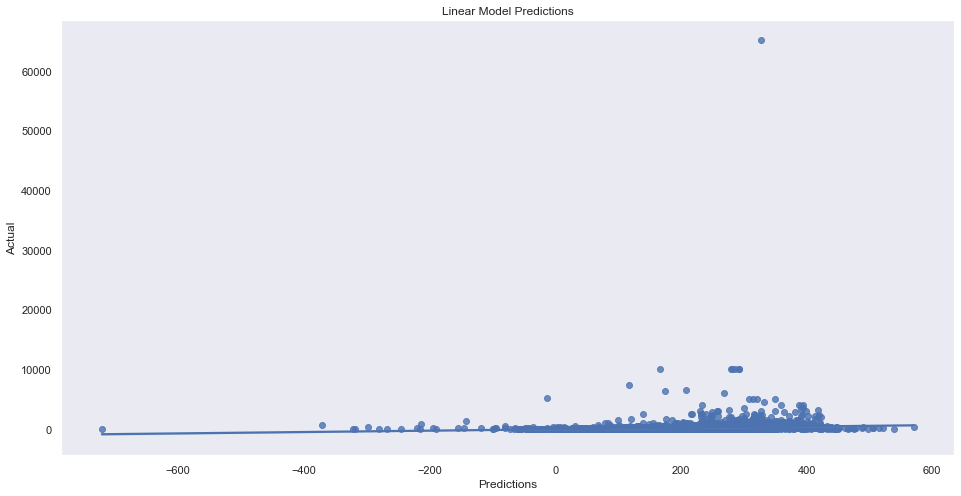

In [36]:
plt.figure(figsize=(16,8))
sns.regplot(predicts,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Linear Model Predictions")
plt.grid(False)
plt.show()

## Finding a Better Model
## Diagnostic Plots

In [37]:
# Residuals vs. Fitted
def r_v_fit(m):
    ax = sns.residplot(m.fittedvalues, m.resid)
    plt.title("Residuals vs. Fitted")
    plt.ylabel("Residuals")
    plt.xlabel("Fitted Values")
    plt.show()
    
# Residuals vs. Order
def r_v_order(m):
    ax = plt.scatter(m.resid.index, m.resid)
    plt.title("Residuals vs. Order")
    plt.ylabel("Residuals")
    plt.xlabel("Order")
    plt.show()

# Histogram
def r_hist(m, binwidth):
    resid = m.resid
    plt.hist(m.resid, bins=np.arange(min(resid), max(resid) + binwidth, binwidth))
    plt.title("Histogram of Residuals")
    plt.show()

In [38]:
# Get separate dataframe for statsmodels analysis
sm_df = pd.read_csv('listings.csv')

# Split data for training and testing
sm_df['logprice'] = np.log(1 + sm_df['price'])
train_data, test_data = train_test_split(sm_df, test_size=0.2)

C:\Users\Aishat\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


P-Value:	2.398395733610874e-07
R_Squared:	0.029348150348848745
R_Squared Adj:	0.028818111894401532


C:\Users\Aishat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


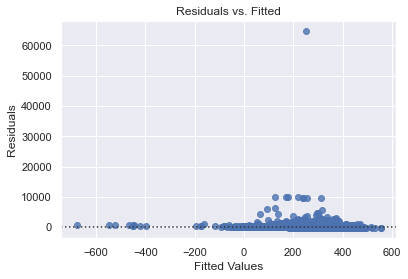

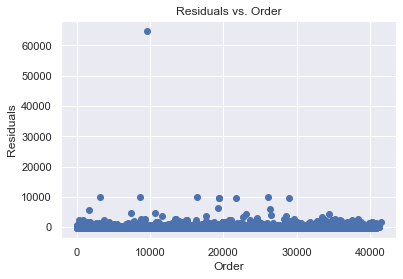

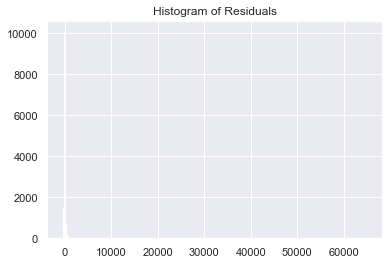

In [39]:
import statsmodels.formula.api as smf

# Create the model
model = smf.ols(
    'price ~ neighbourhood_group + latitude + longitude \
     + room_type + minimum_nights + number_of_reviews + reviews_per_month \
     + calculated_host_listings_count + availability_365',
    data=train_data).fit()

print("P-Value:\t{}".format(model.pvalues[0]))
print("R_Squared:\t{}".format(model.rsquared))
print("R_Squared Adj:\t{}".format(model.rsquared_adj))

# Diagnostic Plots for model
r_v_fit(model)
r_v_order(model)
r_hist(model, 100)

P-Value:	2.415923452386532e-75
R_Squared:	0.41215083547032016
R_Squared Adj:	0.4118298319480713


C:\Users\Aishat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


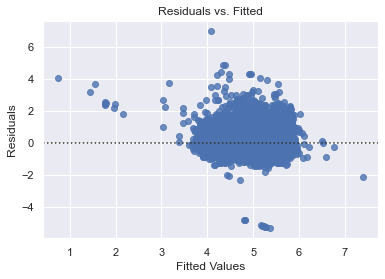

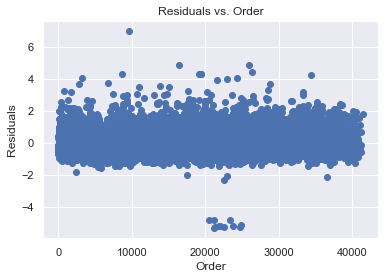

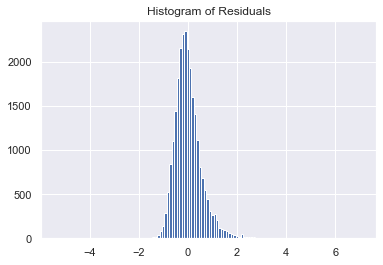

In [40]:
# Fitting a new model with a log-transformed price
log_model = smf.ols(
    'logprice ~ neighbourhood_group + latitude + longitude \
     + room_type + minimum_nights + number_of_reviews + reviews_per_month \
     + calculated_host_listings_count + availability_365',
    data=train_data).fit()

print("P-Value:\t{}".format(log_model.pvalues[0]))
print("R_Squared:\t{}".format(log_model.rsquared))
print("R_Squared Adj:\t{}".format(log_model.rsquared_adj))

# Diagnostic Plots for new, transformed model
r_v_fit(log_model)
r_v_order(log_model)
r_hist(log_model, 0.1)

## Reducing the Model

In [41]:
print(model.pvalues)

Intercept                               2.398396e-07
neighbourhood_group[T.Brooklyn]         1.499166e-02
neighbourhood_group[T.Manhattan]        2.747765e-02
neighbourhood_group[T.Queens]           9.193475e-01
neighbourhood_group[T.Staten Island]    6.240240e-01
room_type[T.Hotel room]                 1.002419e-02
room_type[T.Private room]               1.858923e-48
room_type[T.Shared room]                2.143726e-03
latitude                                2.953318e-04
longitude                               1.153103e-15
minimum_nights                          4.254730e-10
number_of_reviews                       4.760304e-03
reviews_per_month                       1.354570e-01
calculated_host_listings_count          3.357492e-02
availability_365                        5.049735e-15
dtype: float64


In [42]:
log_model_1 = smf.ols(
    'logprice ~ neighbourhood_group + latitude + longitude \
     + room_type + minimum_nights + reviews_per_month \
     + calculated_host_listings_count + availability_365',
    data=train_data).fit()

print("P-Value:\t{}".format(log_model_1.pvalues[0]))
print("R_Squared:\t{}".format(log_model_1.rsquared))
print("R_Squared Adj:\t{}".format(log_model_1.rsquared_adj))

P-Value:	1.760025933426194e-73
R_Squared:	0.4102543016518351
R_Squared Adj:	0.4099552769598219


In [43]:
model.params

Intercept                              -40225.814826
neighbourhood_group[T.Brooklyn]           -54.396291
neighbourhood_group[T.Manhattan]           42.603814
neighbourhood_group[T.Queens]              -2.080467
neighbourhood_group[T.Staten Island]      -20.835865
room_type[T.Hotel room]                   119.326826
room_type[T.Private room]                 -93.080603
room_type[T.Shared room]                  -86.719475
latitude                                 -317.243355
longitude                                -721.752335
minimum_nights                             -0.678888
number_of_reviews                          -0.165764
reviews_per_month                           3.035335
calculated_host_listings_count             -0.169229
availability_365                            0.179562
dtype: float64